## <center>图片几何变换</center>


## 1.cv2.resize函数
`resize(InputArray src, OutputArray dst, Size dsize, double fx=0, double fy=0, int interpolation=INTER_LINEAR )`

- `InputArray src`:输入，原图像，即待改变大小的图像；
- `OutputArray dst`:输出，改变后的图像。这个图像和原图像具有相同的内容，只是大小和原图像不一样而已；
- `dsize`:输出图像的大小。
  - 如果这个参数不为0，那么就代表将原图像缩放到这个Size(width，height)指定的大小；如果这个参数为0，那么原图像缩放之后的大小就要通过下 面的公式来计算：dsize = Size(round(fxsrc.cols), round(fysrc.rows))
- `fx`：width方向的缩放比例，如果它是0，那么它就会按照(double)dsize.width/src.cols来计算。
- `fy`：height方向的缩放比例，如果它是0，那么它就会按照(double)dsize.height/src.rows来计算。

- `interpolation`:这个是指定插值的方式，图像缩放之后，肯定像素要进行重新计算的，就靠这个参数来指定重新计算像素的方式
  - `INTER_NEAREST` - 最邻近插值
  - `INTER_LINEAR` - 双线性插值，如果最后一个参数你不指定，默认使用这种方法
  - `INTER_AREA` - 使用像素面积关系重新取样。这可能是图像抽取的首选方法，因为它可以得到无摩尔纹的结果。但当图像被放大时，它与INTER_NEAREST方法类似。
  - `INTER_CUBIC` - 4x4像素邻域内的双立方插值
  - `INTER_LANCZOS4` - 8x8像素邻域内的Lanczos插值

**ATTENTION**
- `dsize和fx/fy不能同时为0` 要么你就指定好dsize的值，让fx和fy空置直接使用默认值，就像resize(img, imgDst, Size(30,30));要么你就让dsize为0，指定好fx和fy的值，比如fx=fy=0.5，那么就相当于把原图两个方向缩小一倍！
- 至于最后的插值方法，正常情况下使用默认的双线性插值就够用了。
- 几种常用方法的效率是：最邻近插值>双线性插值>双立方插值>Lanczos插值；但是效率和效果成反比，所以根据自己的情况酌情使用。
- 正常情况下，在使用之前dst图像的大小和类型都是不知道的，类型从src图像继承而来，大小也是从原图像根据参数计算出来。但是如果你事先已经指定好dst图像的大小，那么你可以通过下面这种方式来调用函数：
resize(src, dst, dst.size(), 0, 0, interpolation);



缩放

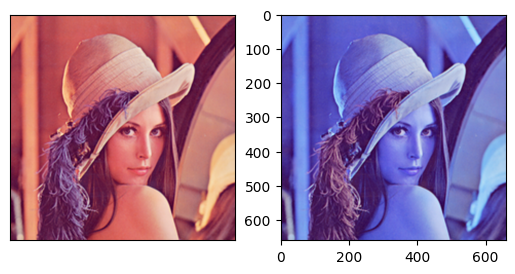

In [11]:
import cv2 as cv
import numpy
import matplotlib.pyplot as plt

img = cv.imread('../Lenna.png')
res = cv.resize(img, None, fx=3, fy=3, interpolation=cv.INTER_CUBIC)

rgb_res = cv.cvtColor(res, cv.COLOR_BGR2RGB)

plt.subplot(121)
# plt.xticks([]), plt.yticks([])
plt.imshow(rgb_res)
plt.subplot(122)
# plt.xticks([]), plt.yticks([])
plt.imshow(res)


##  2.cv2.warpAffine函数